<a href="https://colab.research.google.com/github/mdurgasrikari/Durga_Srikari_INFO5731_Spring2024/blob/main/Maguluri_Durga_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
#In this program we will demonstrate carious text classification models and their performance evaluation. In addition, we will conduct 10-fold cross-validation. We will demonstrate the following
#algorithms: MultinominalNB, SVM, KNN, Decision Tree, Random Forest, XGBoost, Word2Vec, and BERT. Also, we will evaluate the following measurements: Accuracy, Recall, Precision, F-1 score.

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of stopwords for English
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#This Program initialized following classifiers including Multinomial Naive Bayes, SVM, K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost,
# Gaussian Naive Bayes, Word2Vec, and BERT models, use the dataset to train the model and evaluate their performance using cross-validation and test data. Finally, compare the results
!pip install xgboost

In [ ]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import gensim.downloader as api
from gensim.models import KeyedVectors
import torch
from transformers import BertTokenizer, BertModel
from sklearn.naive_bayes import GaussianNB
import re

# Specify a path to download and re-download necessary NLTK resources
nltk.data.path.append('/root/nltk_data')
nltk.download('punkt', force=True)
nltk.download('stopwords')
nltk.download('wordnet')

# Load the data
train_df = pd.read_csv("/content/train (1).csv")
test_df = pd.read_csv("/content/test (1).csv")

# Initialize lists to store results
results = []

# Preprocessing and Cleaning
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing and cleaning function (alternative tokenizer using split)
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text using split
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing function to both train and test datasets
train_df['Review'] = train_df['Review'].apply(preprocess_text)
test_df['Review'] = test_df['Review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Multinominal NB

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['Review'], train_df['Sentiment'], test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(test_df['Review'])

# Implement Multinomial Naive Bayes Algorithm
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_nb = nb_classifier.predict(X_val_tfidf)
accuracy_nb = accuracy_score(y_val, y_pred_val_nb)
recall_nb = recall_score(y_val, y_pred_val_nb)
precision_nb = precision_score(y_val, y_pred_val_nb)
f1_nb = f1_score(y_val, y_pred_val_nb)

# Final Evaluation on Test Data
y_pred_test_nb = nb_classifier.predict(X_test_tfidf)
test_accuracy_nb = accuracy_score(test_df['Sentiment'], y_pred_test_nb)

# Append results to list
results.append({'Model': 'Multinomial Naive Bayes',
                'Cross-Validation Accuracy': cv_scores_nb.mean(),
                'Accuracy': accuracy_nb,
                'Recall': recall_nb,
                'Precision': precision_nb,
                'F1 Score': f1_nb,
                'Test Accuracy': test_accuracy_nb})

SVM

In [ ]:
# Initialize SVM classifier
svm_classifier = SVC()

# Train SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_svm = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_svm = svm_classifier.predict(X_val_tfidf)
accuracy_svm = accuracy_score(y_val, y_pred_val_svm)
recall_svm = recall_score(y_val, y_pred_val_svm)
precision_svm = precision_score(y_val, y_pred_val_svm)
f1_svm = f1_score(y_val, y_pred_val_svm)

# Final Evaluation on Test Data
y_pred_test_svm = svm_classifier.predict(X_test_tfidf)
test_accuracy_svm = accuracy_score(test_df['Sentiment'], y_pred_test_svm)

# Append results to list
results.append({'Model': 'SVM',
                'Cross-Validation Accuracy': cv_scores_svm.mean(),
                'Accuracy': accuracy_svm,
                'Recall': recall_svm,
                'Precision': precision_svm,
                'F1 Score': f1_svm,
                'Test Accuracy': test_accuracy_svm})

In [ ]:
results

[{'Model': 'Multinomial Naive Bayes',
  'Cross-Validation Accuracy': 0.7778177450205965,
  'Accuracy': 0.7926300578034682,
  'Recall': 0.8835904628330996,
  'Precision': 0.7553956834532374,
  'F1 Score': 0.8144796380090498,
  'Test Accuracy': 0.7924217462932455},
 {'Model': 'SVM',
  'Cross-Validation Accuracy': 0.7630078142850614,
  'Accuracy': 0.8005780346820809,
  'Recall': 0.8653576437587658,
  'Precision': 0.7741530740276035,
  'F1 Score': 0.8172185430463577,
  'Test Accuracy': 0.7913234486545854}]

KNN

In [ ]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train KNN classifier
knn_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_knn = knn_classifier.predict(X_val_tfidf)
accuracy_knn = accuracy_score(y_val, y_pred_val_knn)
recall_knn = recall_score(y_val, y_pred_val_knn)
precision_knn = precision_score(y_val, y_pred_val_knn)
f1_knn = f1_score(y_val, y_pred_val_knn)

# Final Evaluation on Test Data
y_pred_test_knn = knn_classifier.predict(X_test_tfidf)
test_accuracy_knn = accuracy_score(test_df['Sentiment'], y_pred_test_knn)

# Append results to list
results.append({'Model': 'K-Nearest Neighbors',
                'Cross-Validation Accuracy': cv_scores_knn.mean(),
                'Accuracy': accuracy_knn,
                'Recall': recall_knn,
                'Precision': precision_knn,
                'F1 Score': f1_knn,
                'Test Accuracy': test_accuracy_knn})

Decision Tree

In [ ]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train Decision Tree classifier
dt_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_dt = cross_val_score(dt_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_dt = dt_classifier.predict(X_val_tfidf)
accuracy_dt = accuracy_score(y_val, y_pred_val_dt)
recall_dt = recall_score(y_val, y_pred_val_dt)
precision_dt = precision_score(y_val, y_pred_val_dt)
f1_dt = f1_score(y_val, y_pred_val_dt)

# Final Evaluation on Test Data
y_pred_test_dt = dt_classifier.predict(X_test_tfidf)
test_accuracy_dt = accuracy_score(test_df['Sentiment'], y_pred_test_dt)

# Append results to list
results.append({'Model': 'Decision Tree',
                'Cross-Validation Accuracy': cv_scores_dt.mean(),
                'Accuracy': accuracy_dt,
                'Recall': recall_dt,
                'Precision': precision_dt,
                'F1 Score': f1_dt,
                'Test Accuracy': test_accuracy_dt})

Random Forest

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train Random Forest classifier
rf_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_rf = rf_classifier.predict(X_val_tfidf)
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
recall_rf = recall_score(y_val, y_pred_val_rf)
precision_rf = precision_score(y_val, y_pred_val_rf)
f1_rf = f1_score(y_val, y_pred_val_rf)

# Final Evaluation on Test Data
y_pred_test_rf = rf_classifier.predict(X_test_tfidf)
test_accuracy_rf = accuracy_score(test_df['Sentiment'], y_pred_test_rf)

# Append results to list
results.append({'Model': 'Random Forest',
                'Cross-Validation Accuracy': cv_scores_rf.mean(),
                'Accuracy': accuracy_rf,
                'Recall': recall_rf,
                'Precision': precision_rf,
                'F1 Score': f1_rf,
                'Test Accuracy': test_accuracy_rf})

XGBoost

In [ ]:
# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Train XGBoost classifier
xgb_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_xgb = xgb_classifier.predict(X_val_tfidf)
accuracy_xgb = accuracy_score(y_val, y_pred_val_xgb)
recall_xgb = recall_score(y_val, y_pred_val_xgb)
precision_xgb = precision_score(y_val, y_pred_val_xgb)
f1_xgb = f1_score(y_val, y_pred_val_xgb)

# Final Evaluation on Test Data
y_pred_test_xgb = xgb_classifier.predict(X_test_tfidf)
test_accuracy_xgb = accuracy_score(test_df['Sentiment'], y_pred_test_xgb)

# Append results to list
results.append({'Model': 'XGBoost',
                'Cross-Validation Accuracy': cv_scores_xgb.mean(),
                'Accuracy': accuracy_xgb,
                'Recall': recall_xgb,
                'Precision': precision_xgb,
                'F1 Score': f1_xgb,
                'Test Accuracy': test_accuracy_xgb})

Word2Vec

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from gensim.models import KeyedVectors
import gensim.downloader as api

# Assuming you have your data loaded and preprocessed
# X_train, X_val, y_train, y_val, test_df are assumed to be defined

# Download the Google News Word2Vec model. Loading an already pretrained model
word2vec_model_path = api.load("word2vec-google-news-300", return_path=True)

# Load the pre-trained Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

# Convert each review into a fixed-size vector by averaging Word2Vec embeddings
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in model:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def word2vec_tokenize(text):
    return text.split()  # Tokenize text by splitting on spaces

# Tokenize and convert reviews to Word2Vec vectors
X_train_word2vec = [average_word_vectors(word2vec_tokenize(review), word2vec_model, word2vec_model.vector_size) for review in X_train]
X_val_word2vec = [average_word_vectors(word2vec_tokenize(review), word2vec_model, word2vec_model.vector_size) for review in X_val]
X_test_word2vec = [average_word_vectors(word2vec_tokenize(review), word2vec_model, word2vec_model.vector_size) for review in test_df['Review']]

# Convert to numpy arrays
X_train_word2vec = np.array(X_train_word2vec)
X_val_word2vec = np.array(X_val_word2vec)
X_test_word2vec = np.array(X_test_word2vec)

# Scale the Word2Vec vectors to be non-negative
scaler = MinMaxScaler()
X_train_word2vec_scaled = scaler.fit_transform(X_train_word2vec)
X_val_word2vec_scaled = scaler.transform(X_val_word2vec)
X_test_word2vec_scaled = scaler.transform(X_test_word2vec)

# Define classifiers
classifiers_word2vec = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}


# Loop through each classifier
for clf_name, clf in classifiers_word2vec.items():
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(clf, X_train_word2vec_scaled, y_train, cv=10)

    # Performance Evaluation
    accuracy = np.mean(cv_scores)
    clf.fit(X_train_word2vec_scaled, y_train)
    y_pred_val = clf.predict(X_val_word2vec_scaled)
    recall = recall_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)

    # Final Evaluation on Test Data
    y_pred_test = clf.predict(X_test_word2vec_scaled)
    test_accuracy = accuracy_score(test_df['Sentiment'], y_pred_test)

    # Append results to list
    results.append({'Model': f"{clf_name} (Word2Vec)",
                    'Cross-Validation Accuracy': accuracy,
                    'Accuracy': accuracy,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'Test Accuracy': test_accuracy})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print results DataFrame
print(results_df)


                                 Model  Cross-Validation Accuracy  Accuracy  \
0              Multinomial Naive Bayes                   0.777818  0.792630   
1                                  SVM                   0.763008  0.800578   
2                  K-Nearest Neighbors                   0.568278  0.531069   
3                        Decision Tree                   0.657330  0.644509   
4                        Random Forest                   0.718024  0.738439   
5                              XGBoost                   0.684258  0.700145   
6   Multinomial Naive Bayes (Word2Vec)                   0.688220  0.688220   
7       K-Nearest Neighbors (Word2Vec)                   0.697078  0.697078   
8             Decision Tree (Word2Vec)                   0.635119  0.635119   
9             Random Forest (Word2Vec)                   0.762825  0.762825   
10                  XGBoost (Word2Vec)                   0.776919  0.776919   
11                      SVM (Word2Vec)              

Bert

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import BertTokenizer, BertModel

# Assuming you have your data loaded and preprocessed
# X_train, X_val, y_train, y_val, test_df are assumed to be defined

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to encode text using BERT tokenizer and model
def encode_text(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    outputs = bert_model(input_ids)
    last_hidden_state = outputs[0].mean(dim=1).detach().numpy()  # Average pool the last hidden states
    return last_hidden_state

# Encode reviews using BERT
X_train_bert = np.array([encode_text(review) for review in X_train])
X_val_bert = np.array([encode_text(review) for review in X_val])
X_test_bert = np.array([encode_text(review) for review in test_df['Review']])

# Define classifiers
classifiers_bert = {
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}


# Loop through each classifier
for clf_name, clf in classifiers_bert.items():
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(clf, X_train_bert.reshape(-1, 768), y_train, cv=10)

    # Performance Evaluation
    accuracy = np.mean(cv_scores)
    clf.fit(X_train_bert.reshape(-1, 768), y_train)  # Reshape for compatibility
    y_pred_val = clf.predict(X_val_bert.reshape(-1, 768))  # Reshape for compatibility
    recall = recall_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)

    # Final Evaluation on Test Data
    y_pred_test = clf.predict(X_test_bert.reshape(-1, 768))  # Reshape for compatibility
    test_accuracy = accuracy_score(test_df['Sentiment'], y_pred_test)

    # Append results to list
    results.append({'Model': f"{clf_name} (BERT)",
                    'Cross-Validation Accuracy': accuracy,
                    'Accuracy': accuracy,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'Test Accuracy': test_accuracy})

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Print results DataFrame
print(results_df)


                                 Model  Cross-Validation Accuracy  Accuracy  \
0              Multinomial Naive Bayes                   0.777818  0.792630   
1                                  SVM                   0.763008  0.800578   
2                  K-Nearest Neighbors                   0.568278  0.531069   
3                        Decision Tree                   0.657330  0.644509   
4                        Random Forest                   0.718024  0.738439   
5                              XGBoost                   0.684258  0.700145   
6   Multinomial Naive Bayes (Word2Vec)                   0.688220  0.688220   
7       K-Nearest Neighbors (Word2Vec)                   0.697078  0.697078   
8             Decision Tree (Word2Vec)                   0.635119  0.635119   
9             Random Forest (Word2Vec)                   0.762825  0.762825   
10                  XGBoost (Word2Vec)                   0.776919  0.776919   
11                      SVM (Word2Vec)              

In [ ]:
results_df

,Model,Cross-Validation Accuracy,Accuracy,Recall,Precision,F1 Score,Test Accuracy
0,Multinomial Naive Bayes,0.777818,0.792630,0.883590,0.755396,0.814480,0.792422
1,SVM,0.763008,0.800578,0.865358,0.774153,0.817219,0.791323
2,K-Nearest Neighbors,0.568278,0.531069,0.992987,0.523669,0.685714,0.512356
3,Decision Tree,0.657330,0.644509,0.704067,0.641124,0.671123,0.668863
4,Random Forest,0.718024,0.738439,0.809257,0.718555,0.761214,0.734212
5,XGBoost,0.684258,0.700145,0.837307,0.666295,0.742076,0.694124
6,Multinomial Naive Bayes (Word2Vec),0.688220,0.688220,0.953717,0.626728,0.756396,0.686436
7,K-Nearest Neighbors (Word2Vec),0.697078,0.697078,0.807854,0.665127,0.729576,0.706205
8,Decision Tree (Word2Vec),0.635119,0.635119,0.650771,0.625337,0.637801,0.628775
9,Random Forest (Word2Vec),0.762825,0.762825,0.805049,0.768407,0.786301,0.774300


# From the results of cross validation of different metrics that include Accuracy, Recall, Precision, F1 score, and Test Accuracy for each model
# we can observe that Multinomial Naive Bayes and SVM performance with TF-IDF features achieves accuracies of 79%
# Word2Vec and BERT enhance model performance, and SVM attains the highest  accuracy 81.1% with Word2Vec and 79.4% with BERT.
#K-Nearest Neighbors fall low across feature representation and indicates  patterns in the sentiment data.
# Overall, leveraging advanced techniques improve sentiment analysis outcomes
# when compared with traditional TF-IDF approaches.

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


# Load the data
data = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
data = data.head(5000)

#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis

#function
def partition(x):
   if x < 3:
        return 'negative'
   return 'positive'

#changing reviews with score less than 3 to be negative
actualScore = data['Rating']
positiveNegative = actualScore.map(partition)
data['Rating'] = positiveNegative

# Drop duplicate rows based on specific columns
df_cleaned = data.drop_duplicates(subset=['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes'], keep='first')

## Preprocessing step for cleaning the Review columns and creating uniquely postive and negative words
nltk.download('stopwords')

# Initialize the Snowball stemmer and stopwords
sno = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def clean_html_tags(sentence):
    """Function to clean the word of any HTML tags."""
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def clean_punctuation(sentence):
    """Function to clean the word of any punctuation or special characters."""
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

def preprocess_text(sentence):
    """Function to preprocess text data."""
    if isinstance(sentence, str):
        filtered_words = []
        sentence = clean_html_tags(sentence)  # Remove HTML tags
        for word in sentence.split():
            for cleaned_word in clean_punctuation(word).split():
                if cleaned_word.isalpha() and len(cleaned_word) > 2:
                    if cleaned_word.lower() not in stop_words:
                        stemmed_word = sno.stem(cleaned_word.lower())
                        filtered_words.append(stemmed_word)
        return ' '.join(filtered_words)
    else:
        return ''  # Return empty string for non-string input

# Apply preprocessing to 'Reviews' column and create 'Cleaned_Text' column
df_cleaned['Cleaned_Text'] = df_cleaned['Reviews'].apply(preprocess_text)


# Drop rows with missing values in 'CleanedText' column (if needed)
df_cleaned.dropna(subset=['Cleaned_Text'], inplace=True)

# Ensure 'CleanedText' column contains string values
df_cleaned['Cleaned_Text'] = df_cleaned['Cleaned_Text'].astype(str)

# Instantiate CountVectorizer and fit-transform the text data
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df_cleaned['Cleaned_Text'].values)


#Fiting the -means model and for this fit, we are using no of clusters = 7
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 7,init='k-means++',random_state=99)
model.fit(bow)

# Giving Labels/assigning a cluster to each point/text
df_new = df_cleaned
df_new['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers


# Iterate through each cluster label
for i in range(7):  # Since you have 7 clusters (0 to 6)
    print("Reviews assigned to cluster ", i)
    print("-" * 70)

    # Check if the cluster label 'i' exists in the grouped DataFrame
    if i in df_new['Bow Clus Label'].unique():
        # Get the index of the first review in the cluster 'i'
        idx = df_new.groupby(['Bow Clus Label']).groups[i][0]

        # Print the review corresponding to the index
        print(df_new.loc[idx, 'Reviews'])
    else:
        print("No reviews assigned to this cluster.")

    print('\n')
    print("_" * 70)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-35-05b630138c39>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_Text'] = df_cleaned['Reviews'].apply(preprocess_text)
<ipython-input-35-05b630138c39>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['Cleaned_Text'], inplace=True)
<ipython-input-35-05b630138c39>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Reviews assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


______________________________________________________________________
Reviews assigned to cluster  1
----------------------------------------------------------------------
'JUNING SMARTPHONE C5Color: GoldSize: 6.0"I been wanting to have a new smartphone that has a bigger screen size compared to what I have right now, so I feel lucky to have this one. It comes with Manual, battery charger/USB, earphone, clear casing that fit so right and not bulky at all. Juning Unlocked Smartphone 6.0 C5 exceeded my expectations, t

<ipython-input-35-05b630138c39>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers


In [ ]:
#Implementing DBSCAN (Density-Based Spatial Clustering of Applications with Noise) similar to the KMeans clustering as above. Using BOW defined above and reducing dimensionality as this is huge dataset
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# Apply TruncatedSVD for dimensionality reduction (reduce to 100 components)
svd = TruncatedSVD(n_components=100, random_state=42)
bow_reduced = svd.fit_transform(bow)

# Compute pairwise cosine similarity on reduced data
cosine_sim = cosine_similarity(bow_reduced)

# Convert cosine similarity to a distance matrix (values between 0 and 1)
distance_matrix = 1 - cosine_sim

# Scale distance matrix to range [0, 1] (if necessary)
scaler = MinMaxScaler()
distance_matrix_scaled = scaler.fit_transform(distance_matrix)

# Instantiate DBSCAN with precomputed distance matrix
eps = 0.5  # Adjust based on dataset characteristics
min_samples = 10  # Adjust based on dataset characteristics
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
dbscan.fit(distance_matrix_scaled)

# Add DBSCAN cluster labels to DataFrame
df_new = df_cleaned.copy()
df_new['DBSCAN Clus Label'] = dbscan.labels_

# Group by DBSCAN cluster labels and count points in each cluster
cluster_counts = df_new.groupby(['DBSCAN Clus Label']).size().sort_values(ascending=False)

# Reading a review from each cluster
for label in cluster_counts.index:
    if label == -1:
        print("\nOutliers (Noise) assigned to DBSCAN cluster -1")
    else:
        print(f"\nReviews assigned to DBSCAN cluster {label}")

    print("-" * 70)
    cluster_indices = df_new[df_new['DBSCAN Clus Label'] == label].index
    for review_index in cluster_indices[:min(1, len(cluster_indices))]:
        print(df_new.loc[review_index, 'Reviews'])
        print("_" * 70)



Reviews assigned to DBSCAN cluster 0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
______________________________________________________________________

Reviews assigned to DBSCAN cluster 3
----------------------------------------------------------------------
okay
______________________________________________________________________

Reviews assigned to DBSCAN cluster 12
----------------------------------------------------------------------
Delivered as promised
______________________________________________________________________

Reviews assigned to DBSCAN cluster 1
-------------------

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

# Assuming BOW is already defined
# Apply TruncatedSVD for dimensionality reduction (reduce to 100 components)
svd = TruncatedSVD(n_components=100, random_state=42)
bow_reduced = svd.fit_transform(bow)

# Compute pairwise cosine similarity on reduced data
cosine_sim = cosine_similarity(bow_reduced)

# Instantiate AgglomerativeClustering and fit the data
n_clusters = 7  # Number of clusters to form
agg_clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',  # Use 'metric' instead of 'affinity'
    linkage='average'
)
agg_clustering.fit(cosine_sim)

# Add Hierarchical Clustering cluster labels to DataFrame
df_new = df_cleaned.copy()
df_new['Hierarchical Clus Label'] = agg_clustering.labels_

# Group by Hierarchical Clustering cluster labels and count points in each cluster
cluster_counts = df_new.groupby(['Hierarchical Clus Label']).size().sort_values(ascending=False)

# Reading a review from each cluster
for label in cluster_counts.index:
    print("\nReviews assigned to Hierarchical Clustering cluster", label)
    print("-" * 70)

    # Find the first review in the current cluster
    review_index = df_new[df_new['Hierarchical Clus Label'] == label].index[0]
    print(df_new.loc[review_index, 'Reviews'])
    print("_" * 70)



Reviews assigned to Hierarchical Clustering cluster 0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
______________________________________________________________________

Reviews assigned to Hierarchical Clustering cluster 1
----------------------------------------------------------------------
Unlocked phones were never this good before. As a phone it works great. The camera is good in daylight, not so good in dark settings, but for the price that's fair. The screen itself looks very good, way better than the run of the mill budget phones. The speakers are fantastic. Alcatel has a partnersh

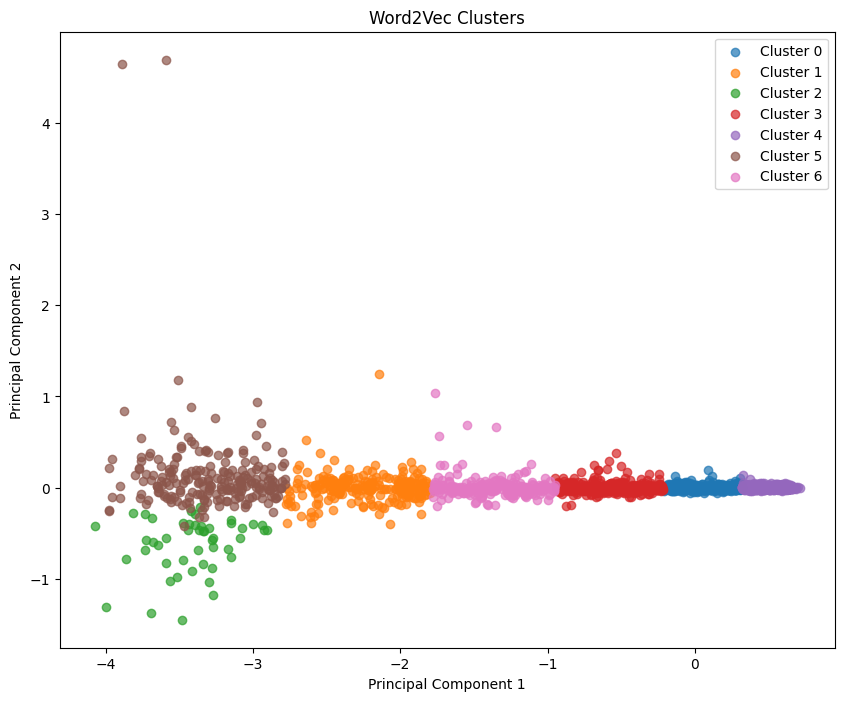


Reviews assigned to KMeans cluster 0
----------------------------------------------------------------------
I've had the phone for one month. It is already turning itself on and having trouble turning back on. The port to charge it is messed up and no charger will hardly stay connected. The camera is AWFUL. The pictures are terrible and the flash doesn't work. I have never been so upset in a phone purchase in all my life.
______________________________________________________________________

Reviews assigned to KMeans cluster 1
----------------------------------------------------------------------
More complicated than I expected. Terrible reception. Too hard for my mom to use. Just frustrates her.
______________________________________________________________________

Reviews assigned to KMeans cluster 2
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it
_________________________________

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Tokenize the text data into words
tokenized_text = [text.split() for text in df_cleaned['Cleaned_Text']]

# Train Word2Vec model on the tokenized text
vector_size = 100  # Dimensionality of word vectors
window_size = 5  # Context window size
min_count = 1  # Minimum frequency count of words
sg = 0  # Training algorithm: 0 for CBOW, 1 for Skip-gram
model_w2v = Word2Vec(tokenized_text, vector_size=vector_size, window=window_size,
                     min_count=min_count, sg=sg)

# Get word vectors and vocabulary
word_vectors = model_w2v.wv
vocabulary = word_vectors.key_to_index

# Cluster word vectors using KMeans
# Convert word vectors to array
word_vectors_array = np.array([word_vectors[word] for word in vocabulary])

# Instantiate KMeans and fit the word vectors
n_clusters = 7  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(word_vectors_array)

# Reduce dimensionality of word vectors for visualization (using PCA)
pca = PCA(n_components=2, random_state=42)
word_vectors_2d = pca.fit_transform(word_vectors_array)

# Visualize clustered word vectors in 2D
plt.figure(figsize=(10, 8))
for label in range(n_clusters):
    plt.scatter(word_vectors_2d[cluster_labels == label, 0],
                word_vectors_2d[cluster_labels == label, 1],
                label=f'Cluster {label}', alpha=0.7)
plt.title('Word2Vec Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Reading a review from each cluster
for label in range(n_clusters):
    print("\nReviews assigned to KMeans cluster", label)
    print("-" * 70)

    # Find the first review in the current cluster
    review_index = np.where(cluster_labels == label)[0][0]  # Get the first index of the current cluster label
    print(df_cleaned.iloc[review_index]['Reviews'])
    print("_" * 70)



In [ ]:
!pip install transformers

In [ ]:
# Import necessary libraries
import torch
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Mock setup for df_cleaned (replace this with your actual data loading)
# Example DataFrame structure: Cleaned_Text and Reviews columns
data = {
    'Cleaned_Text': [
        "This movie was fantastic! The plot was engaging.",
        "Terrible movie. Waste of time.",
        "An average film with some good moments.",
        "Amazing experience, the cinematography was brilliant!",
        "Disappointing. Expected much more from the director.",
    ],
    'Reviews': [
        "This movie was fantastic! The plot was engaging.",
        "Terrible movie. Waste of time.",
        "An average film with some good moments.",
        "Amazing experience, the cinematography was brilliant!",
        "Disappointing. Expected much more from the director.",
    ]
}
df_cleaned = pd.DataFrame(data)

# Drop rows with missing values in 'Cleaned_Text' column
df_cleaned.dropna(subset=['Cleaned_Text'], inplace=True)

# Tokenize the text data using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_text = df_cleaned['Cleaned_Text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Pad sequences to a fixed length (max_length) and convert to numpy array
max_length = 128  # Adjust as needed
padded_text = np.array([text[:max_length] + [0] * (max_length - len(text[:max_length])) for text in tokenized_text])

# Initialize BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Use BERT model to generate embeddings
input_ids = torch.tensor(padded_text)
with torch.no_grad():
    outputs = model(input_ids)

# Extract embeddings from BERT output (CLS token embeddings)
embeddings = outputs[0][:, 0, :].numpy()  # Using CLS token for sentence embeddings

# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=100, random_state=42)
bert_reduced = svd.fit_transform(embeddings)

# Compute pairwise cosine similarity on reduced data
cosine_sim_bert_reduced = cosine_similarity(bert_reduced)

# Example: Compute pairwise cosine similarity between first two samples
similarity = cosine_sim_bert_reduced[0, 1]
print("Pairwise Cosine Similarity between first two samples:", similarity)

# Cluster labels (mocked for demonstration; replace with actual clustering logic)
# For example, use KMeans or AgglomerativeClustering to generate cluster_labels
n_clusters = 3  # Example: Assume 3 clusters
cluster_labels = np.random.randint(0, n_clusters, size=len(df_cleaned))  # Random labels for demonstration

# Reading a review from each cluster
for label in range(n_clusters):
    print("\nReviews assigned to cluster", label)
    print("-" * 70)

    # Find the first review in the current cluster
    review_index = np.where(cluster_labels == label)[0][0]  # Get the first index of the current cluster label
    print(df_cleaned.iloc[review_index]['Reviews'])
    print("_" * 70)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Pairwise Cosine Similarity between first two samples: 0.96507204

Reviews assigned to cluster 0
----------------------------------------------------------------------
Disappointing. Expected much more from the director.
______________________________________________________________________

Reviews assigned to cluster 1
----------------------------------------------------------------------
This movie was fantastic! The plot was engaging.
______________________________________________________________________

Reviews assigned to cluster 2
----------------------------------------------------------------------
An average film with some good moments.
______________________________________________________________________


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
In this exercise, I learned how to train model using the following algorithms: MultinominalNB, SVM, KNN, Decision tree, Random Forest, XGBoost, Word2Vec, BERT and implementing the following evaluation
metrics on the algorithms: Accuracy, Recall, Precison, F-1 score. I also learned how to apply clustering methods to a dataset:K-means, DBSCAN, Hierarchical clustering, Word2Vec, BERT. It was
also a good exercise to learn how to provide comparisons of various evaluation metrics for different algorithms

'''